In [211]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv('data/churn.csv')
df.head(5)

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [214]:
df.nunique()

Unnamed: 0                      36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [215]:
df['age'].unique()
# 'age' includes numerical features only, seems to be OK

array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
       33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
       58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
       46, 15, 64, 63])

In [216]:
df['gender'].unique()
# 'gender' seems to be OK
# convert to category
df['gender'] = df['gender'].astype('category')
df['gender'].describe()

count     36992
unique        3
top           F
freq      18490
Name: gender, dtype: object

In [217]:
# drop 'security_no' and 'Unnamed: 0' because it has no predictiv value
df.drop(['security_no', 'Unnamed: 0'], axis=1, inplace=True)

In [218]:
print(df['region_category'].unique())
print(df['region_category'].isna().sum())
print(df['region_category'].isna().sum()/ df['region_category'].isna().count())
df['region_category'] = df['region_category'].astype('category')
df['region_category'].describe()

['Village' 'City' 'Town' nan]
5428
0.14673442906574394


count     31564
unique        3
top        Town
freq      14128
Name: region_category, dtype: object

region_category are three unique values: 'Village', 'City', 'Town' and 5428 missing values (14.67%)
convert to category

In [219]:
# membership_category 
print(df['membership_category'].unique())
# encode this feature after splitting into ordinal category


['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


In [220]:
#sorted(df['joining_date'].unique())
#df['joining_date'].isna().sum()
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d').dt.date
#TODO : change datetime to only date (to make it look nicer)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           36992 non-null  int64   
 1   gender                        36992 non-null  category
 2   region_category               31564 non-null  category
 3   membership_category           36992 non-null  object  
 4   joining_date                  36992 non-null  object  
 5   joined_through_referral       36992 non-null  object  
 6   referral_id                   36992 non-null  object  
 7   preferred_offer_types         36704 non-null  object  
 8   medium_of_operation           36992 non-null  object  
 9   internet_option               36992 non-null  object  
 10  last_visit_time               36992 non-null  object  
 11  days_since_last_login         36992 non-null  int64   
 12  avg_time_spent                36992 non-null  

In [221]:
print(df['joining_date'].min())
print(df['joining_date'].max())

2015-01-01
2017-12-31


joining dates of 3 years

In [222]:
# joined_through_referral
print(df['joined_through_referral'].unique())


['No' '?' 'Yes']


In [223]:
print(df['referral_id'].groupby(df['joined_through_referral']).unique())

joined_through_referral
?      [CID21329, CID56614, CID35062, CID29752, CID40...
No                                            [xxxxxxxx]
Yes    [CID12313, CID3793, CID24708, CID19275, CID108...
Name: referral_id, dtype: object


In [224]:
df[['referral_id', 'joined_through_referral']].sample(30)

,referral_id,joined_through_referral
33217,CID33155,Yes
20683,xxxxxxxx,No
9627,xxxxxxxx,No
101,CID44094,Yes
36647,xxxxxxxx,No
6072,CID7642,Yes
6037,CID21317,Yes
34828,xxxxxxxx,No
18493,CID56631,Yes
3809,CID21602,?


In [225]:
df['referral_id'].iloc[1]

'CID21329'

In [226]:
df['referral_id'][df['referral_id'].str.startswith('CID')]
df['CID'] = df['referral_id']
df['CID'][df['CID'].str.startswith('CID')] = 'CID'

/var/folders/jd/3w_70f6x53x9_f7dy70wfr5r0000gn/T/ipykernel_94580/71707630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CID'][df['CID'].str.startswith('CID')] = 'CID'


In [227]:
df['CID'].unique()

array(['xxxxxxxx', 'CID', 'No referral'], dtype=object)

<Axes: xlabel='CID', ylabel='count'>

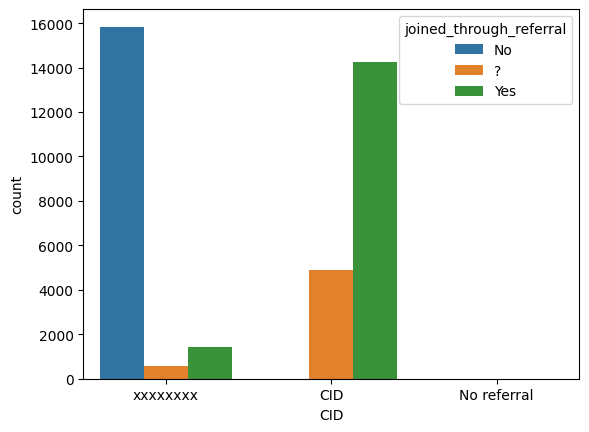

In [228]:
sns.countplot(df, hue='joined_through_referral', x='CID')

In [229]:
print(df['preferred_offer_types'].unique())
print(df['preferred_offer_types'].isna().sum())
print(df['preferred_offer_types'].isna().sum()/ df['preferred_offer_types'].isna().count())
df['preferred_offer_types'] = df['preferred_offer_types'].astype('category')
df['preferred_offer_types'].describe()

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
288
0.007785467128027681


count                     36704
unique                        3
top       Gift Vouchers/Coupons
freq                      12349
Name: preferred_offer_types, dtype: object

In [230]:
print(df['medium_of_operation'].unique())
df['medium_of_operation'] = df['medium_of_operation'].astype('category')
df['medium_of_operation'].describe()

['?' 'Desktop' 'Smartphone' 'Both']


count       36992
unique          4
top       Desktop
freq        13913
Name: medium_of_operation, dtype: object

In [231]:
print(df['internet_option'].unique())
df['internet_option'] = df['internet_option'].astype('category')
df['internet_option'].describe()

['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']


count     36992
unique        3
top       Wi-Fi
freq      12413
Name: internet_option, dtype: object

In [232]:
print(df['last_visit_time'].unique())
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S').dt.time
#df['last_visit_time'] = df['last_visit_time'].astype('time')
print(df['last_visit_time'].unique())

['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:50:03' '01:39:52']
[datetime.time(16, 8, 2) datetime.time(12, 38, 13)
 datetime.time(22, 53, 21) ... datetime.time(4, 14, 5)
 datetime.time(9, 50, 3) datetime.time(1, 39, 52)]


In [233]:
print(df['days_since_last_login'].unique())
df['days_since_last_login'][df['days_since_last_login'] == -999].count()

[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]


1999

We suspect that there are 1999 clients who never logged into the site (indicated as -999).

In [234]:
print(df['avg_time_spent'].describe())

count    36992.000000
mean       243.472334
std        398.289149
min      -2814.109110
25%         60.102500
50%        161.765000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64


There are negative values which don't make sense. Looking at the min/max values, we assume that the time is in seconds per day.

In [235]:
print(df['avg_transaction_value'].isna().sum()) # check for missing values
print(df['avg_transaction_value'].describe())

0
count    36992.000000
mean     29271.194003
std      19444.806226
min        800.460000
25%      14177.540000
50%      27554.485000
75%      40855.110000
max      99914.050000
Name: avg_transaction_value, dtype: float64


count     36992
unique     1654
top       Error
freq       3522
Name: avg_frequency_login_days, dtype: object
['17.0' '10.0' '22.0' ... '-9.32551114210603' '-8.759329712785977'
 '27.8399274405269']


<Axes: xlabel='avg_frequency_login_days', ylabel='Count'>

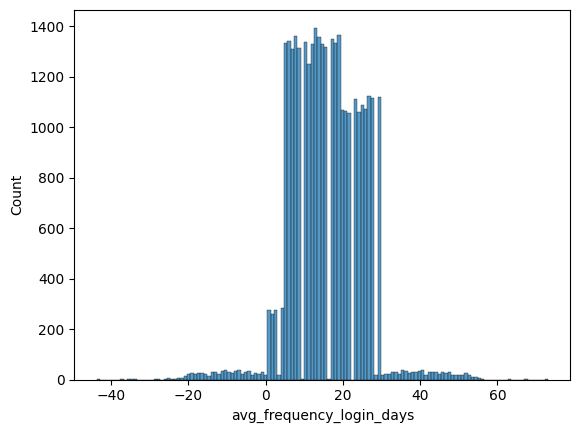

In [236]:
print(df['avg_frequency_login_days'].describe())
print(df['avg_frequency_login_days'].unique())

#non_numeric_values = df['avg_frequency_login_days'][df['avg_frequency_login_days'].apply(lambda x: not pd.api.types.is_numeric_dtype(type(x)))]
#print(non_numeric_values)

df['avg_frequency_login_days'][df['avg_frequency_login_days'] == 'Error'].count()
df['avg_frequency_login_days'][df['avg_frequency_login_days'] != 'Error'].astype('float32').describe()
#df['avg_frequency_login_days'][(df['avg_frequency_login_days'] != 'Error') & (df['avg_frequency_login_days'] < 0)].astype('float32')
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce').astype('float32') # errors = coerce, converts non-numeric values to NaN
#df['avg_frequency_login_days'][df['avg_frequency_login_days' < 0 ]].count()
#df.info()

sns.histplot(df['avg_frequency_login_days'] )


It's strange that there are negative values for average frequency login days. The plot looks as if the data has already been log transformed.

count    33549.000000
mean       686.882199
std        194.063624
min       -760.661236
25%        616.150000
50%        697.620000
75%        763.950000
max       2069.069761
Name: points_in_wallet, dtype: float64
[781.75                nan 500.69       ... 242.97962545 639.51
 197.26441364]


<Axes: xlabel='points_in_wallet', ylabel='Count'>

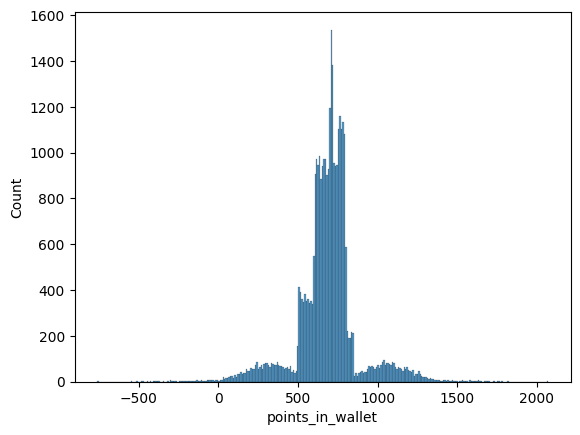

In [237]:
print(df['points_in_wallet'].describe())
print(df['points_in_wallet'].unique())

sns.histplot(df['points_in_wallet'] )

count     36992
unique        2
top         Yes
freq      20342
Name: used_special_discount, dtype: object
['Yes' 'No']


count     36992
unique        2
top         Yes
freq      20342
Name: used_special_discount, dtype: object

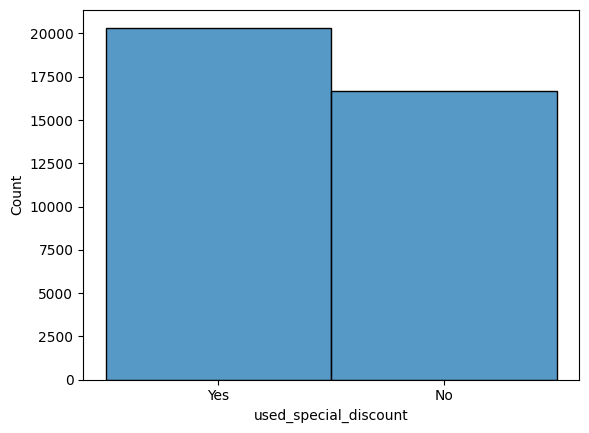

In [238]:
print(df['used_special_discount'].describe())
print(df['used_special_discount'].unique())

sns.histplot(df['used_special_discount'])

df['used_special_discount'] = df['used_special_discount'].astype('category')
df['used_special_discount'].describe()


count     36992
unique        2
top         Yes
freq      20440
Name: offer_application_preference, dtype: object
['Yes' 'No']


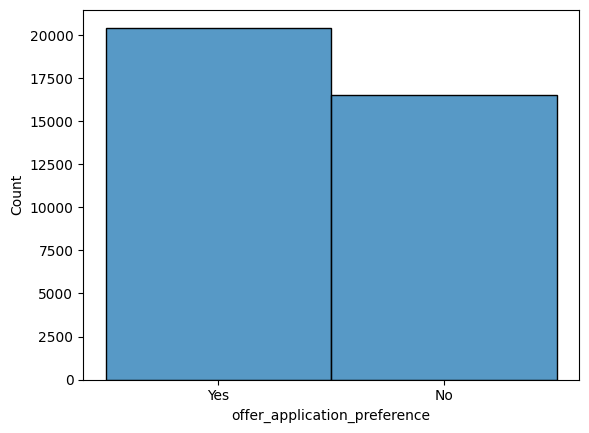

In [239]:
print(df['offer_application_preference'].describe())
print(df['offer_application_preference'].unique())
sns.histplot(df['offer_application_preference'])

df['offer_application_preference'] = df['offer_application_preference'].astype('category')

count     36992
unique        2
top          No
freq      18602
Name: past_complaint, dtype: object
['No' 'Yes']


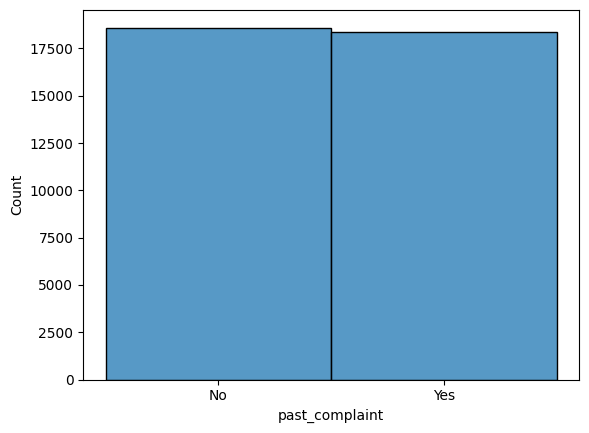

In [240]:
print(df['past_complaint'].describe())
print(df['past_complaint'].unique())
sns.histplot(df['past_complaint'])

df['past_complaint'] = df['past_complaint'].astype('category')

count              36992
unique                 5
top       Not Applicable
freq               18602
Name: complaint_status, dtype: object
['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']


/var/folders/jd/3w_70f6x53x9_f7dy70wfr5r0000gn/T/ipykernel_94580/2656985750.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, 'Not Applicable'),
 Text(1, 0, 'Solved'),
 Text(2, 0, 'Solved in Follow-up'),
 Text(3, 0, 'Unsolved'),
 Text(4, 0, 'No Information Available')]

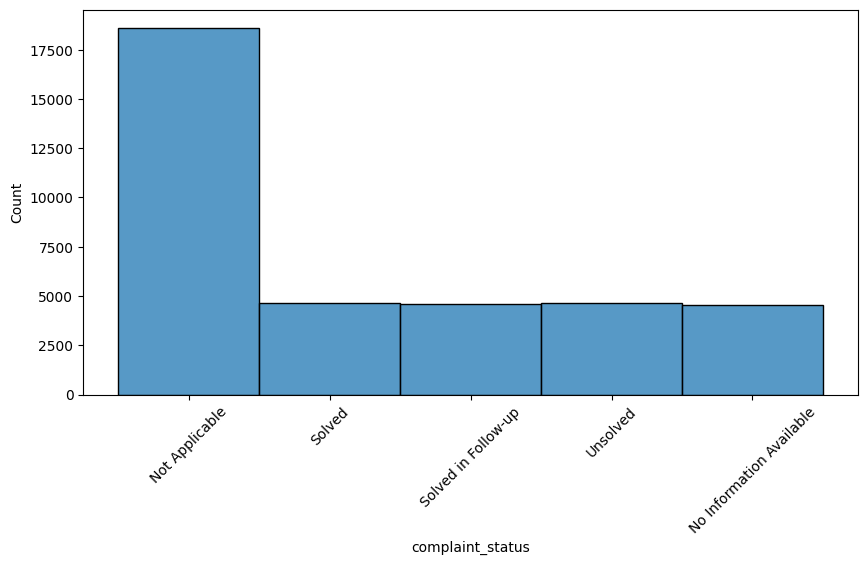

In [241]:
print(df['complaint_status'].describe())
print(df['complaint_status'].unique())

plt.figure(figsize=(10,5))
chart = sns.histplot(df['complaint_status'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
#sns.histplot(df['complaint_status'])

"Not applicable" may refer to the customers with no complaints.

count                    36992
unique                       9
top       Poor Product Quality
freq                      6350
Name: feedback, dtype: object
['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


/var/folders/jd/3w_70f6x53x9_f7dy70wfr5r0000gn/T/ipykernel_94580/3414028658.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Products always in Stock'),
 Text(1, 0, 'Quality Customer Care'),
 Text(2, 0, 'Poor Website'),
 Text(3, 0, 'No reason specified'),
 Text(4, 0, 'Poor Product Quality'),
 Text(5, 0, 'Poor Customer Service'),
 Text(6, 0, 'Too many ads'),
 Text(7, 0, 'User Friendly Website'),
 Text(8, 0, 'Reasonable Price')]

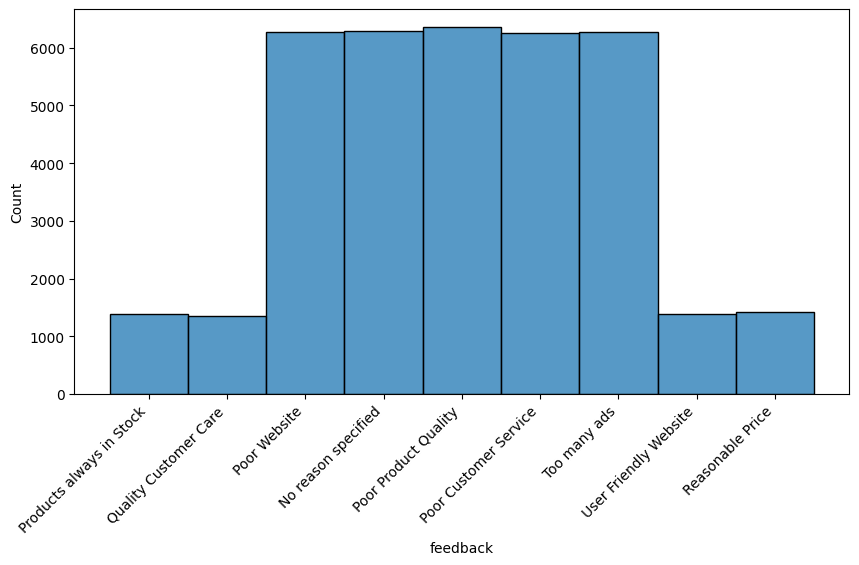

In [242]:
print(df['feedback'].describe())
print(df['feedback'].unique())

plt.figure(figsize=(10,5))
chart = sns.histplot(df['feedback'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

count    36992.000000
mean         0.540982
std          0.498324
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn_risk_score, dtype: float64
[0 1]


<Axes: xlabel='churn_risk_score', ylabel='Count'>

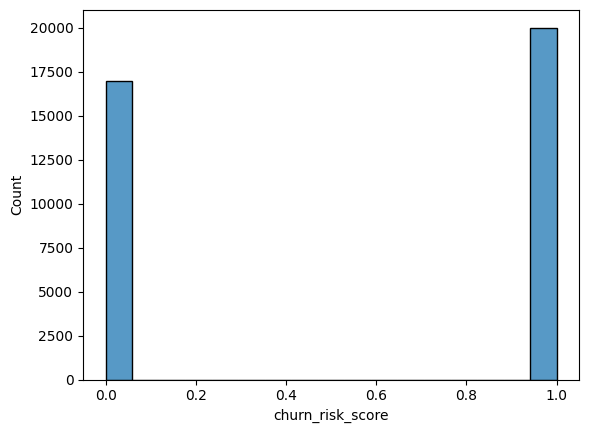

In [243]:
print(df['churn_risk_score'].describe())
print(df['churn_risk_score'].unique())
sns.histplot(df['churn_risk_score'])

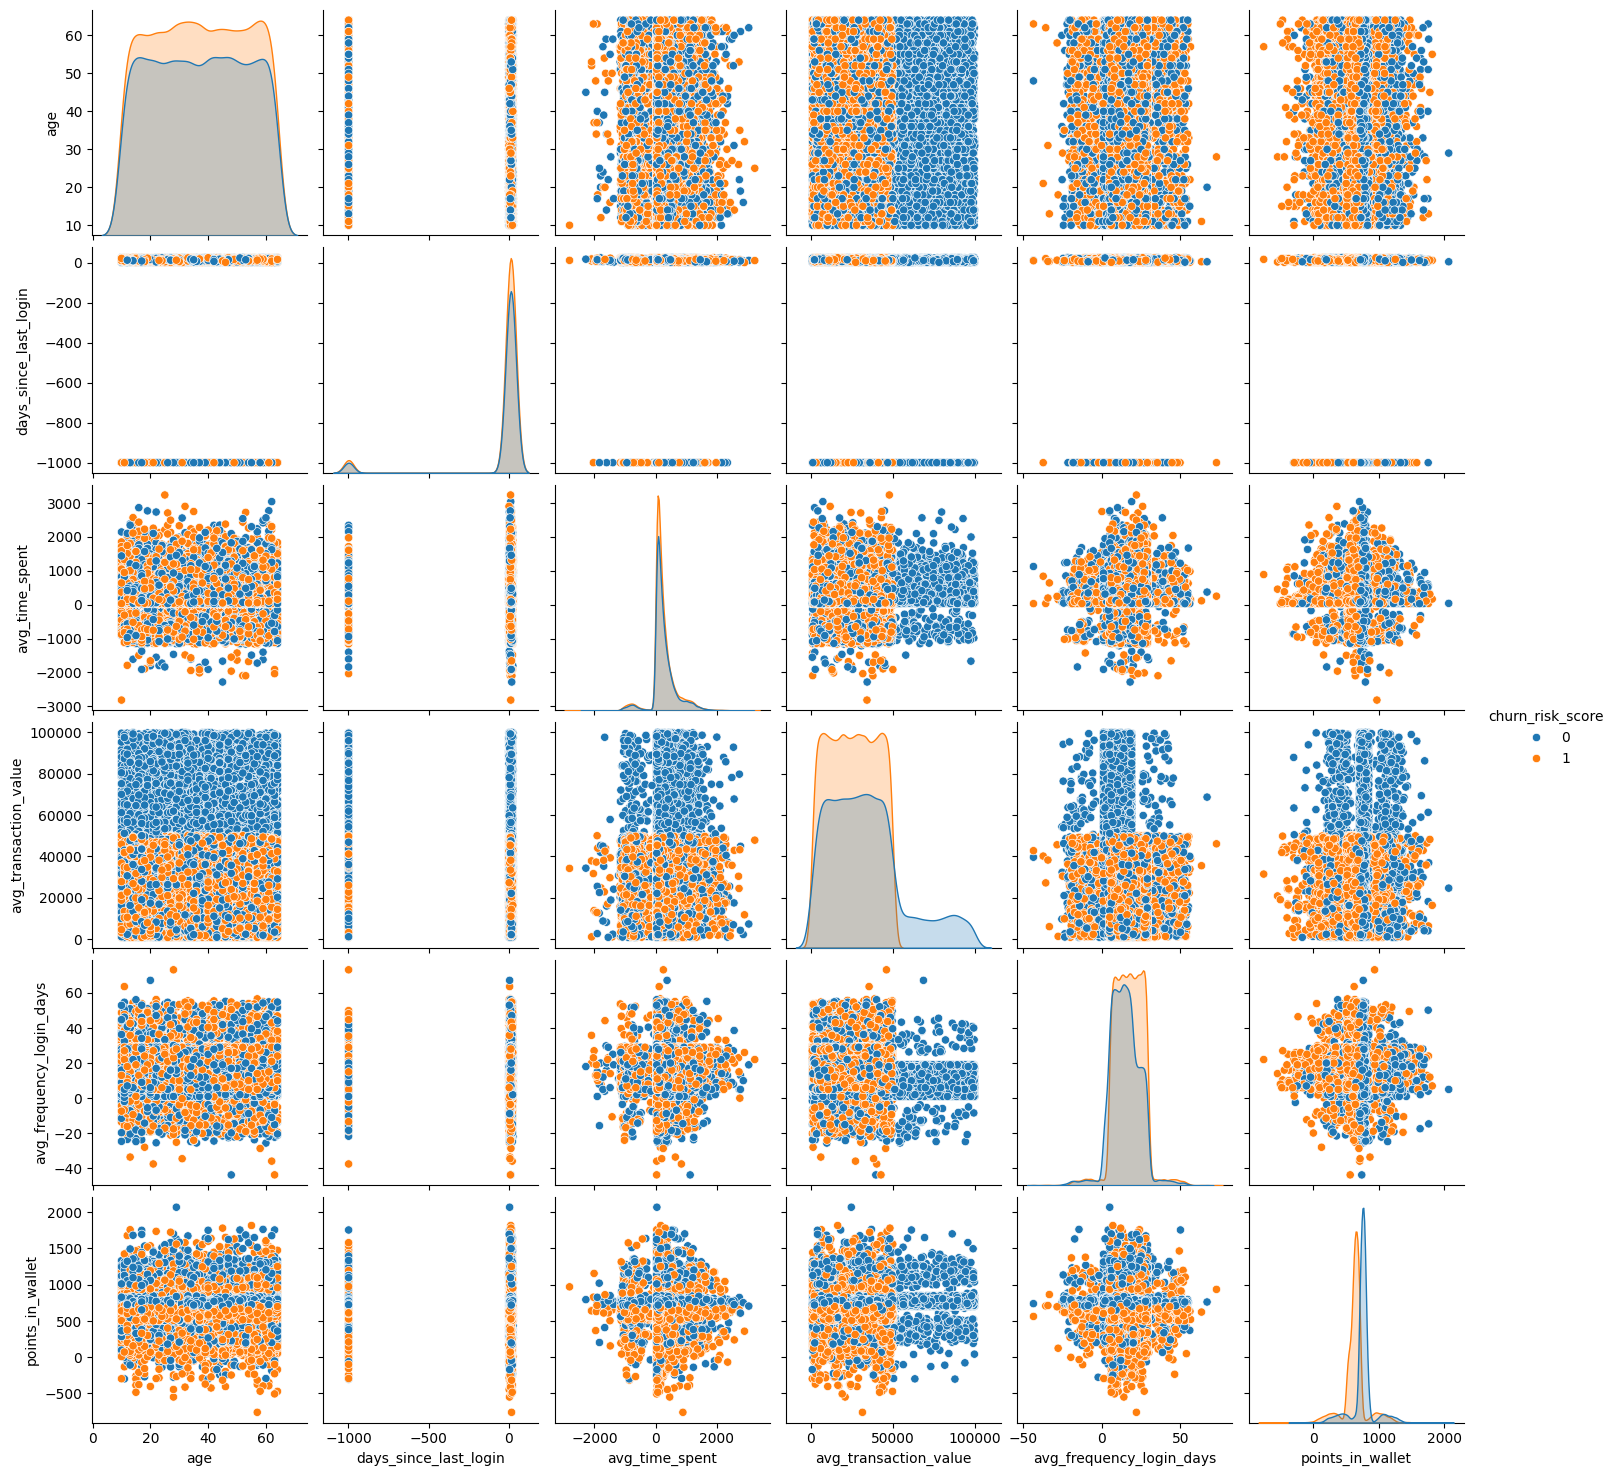

In [244]:
sns.pairplot(df, hue='churn_risk_score')

## Todo for cleaning
### features to be ordinal encoded after splitting:
- membership_category 

### features to be further examined:
- 'referral_id', 'joined_through_referral' 
  -> correlation between the features  
  -> how to deal with '?' and no_referrals with a CID-number   
  -> correlation between specific 'referral_id' and target. e.g. CID5xxx has a higher value for customer loyalty as CID1XXXX
- 'feedback' group by positive and negative feedback

### to drop
- preferred_offer_types NaN

### special cases
- days_since_last_login value -999 might be user who never logged into the site
- avg_time_spent examine negative values
- complaint_status -> how to deal with "no information available"
